# Imbalance Data project

### **1) Libraries and dataset upload**

In [1]:
# to work with dataframes
import pandas            as pd

# To Visualize
import matplotlib.pyplot as plt
import seaborn           as sns

from collections import Counter
from scipy       import stats

# Scikit learn models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model    import LogisticRegression

# to create pipelines
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer

# to preprocess data
from sklearn.preprocessing import StandardScaler,RobustScaler

# Performance metrics for ML projects
from sklearn.metrics import accuracy_score, balanced_accuracy_score, plot_confusion_matrix, confusion_matrix, classification_report, precision_score, recall_score, f1_score,r2_score, explained_variance_score,mean_absolute_error

# to balance dataframes
from imblearn.under_sampling import RandomUnderSampler,NearMiss, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier

In [2]:
# reading the dataset
df = pd.read_csv('creditcard.csv')

### **2) Explore the dataset and understand the distribution of the objective variable**

In [3]:
# Evaluation of data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Regarding the dataset's quality, we can observe that it contains 284,807 observations. There are no missing values, and all variables are numeric.

In [4]:
# Realizamos un descriptivo estadistico de los datos
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


As indicated in the description on Kaggle, all columns in the dataset have been scaled and preprocessed with PCA, except for Time and Amount (which will be addressed later). We will now proceed to evaluate the distribution of our target variable, as well as the various explanatory variables.

Fraud register: 492
Fraud without register: 284315


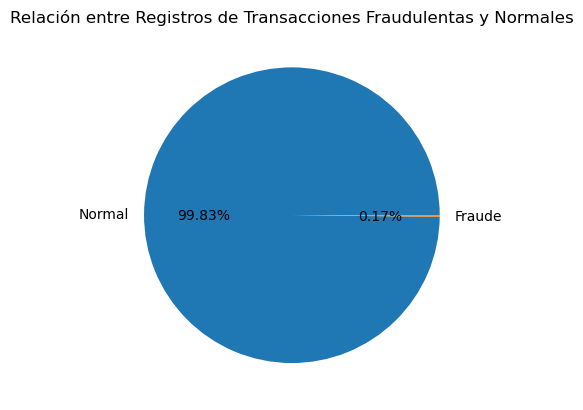

In [5]:
# Inspección de la variable de interés
conteo = df.groupby('Class').size().to_frame().rename(columns={0:'Count'}).reset_index()
labels = ['Normal','Fraude']
plt.pie(conteo['Count'], labels = labels,autopct='%.2f%%')
plt.title("Relación entre Registros de Transacciones Fraudulentas y Normales")
print('Registros con Fraude: {}'.format(int(conteo[conteo['Class']==1]['Count'])))
print('Registros sin Fraude: {}'.format(int(conteo[conteo['Class']==0]['Count'])));

Nuestra variable de interés está fuertemente desbalanceada, representando apenas el 0.17% del tota de los datos. A continuación compararemos si existen diferencias entre la distribución de las transacciones con y sin fraude: 

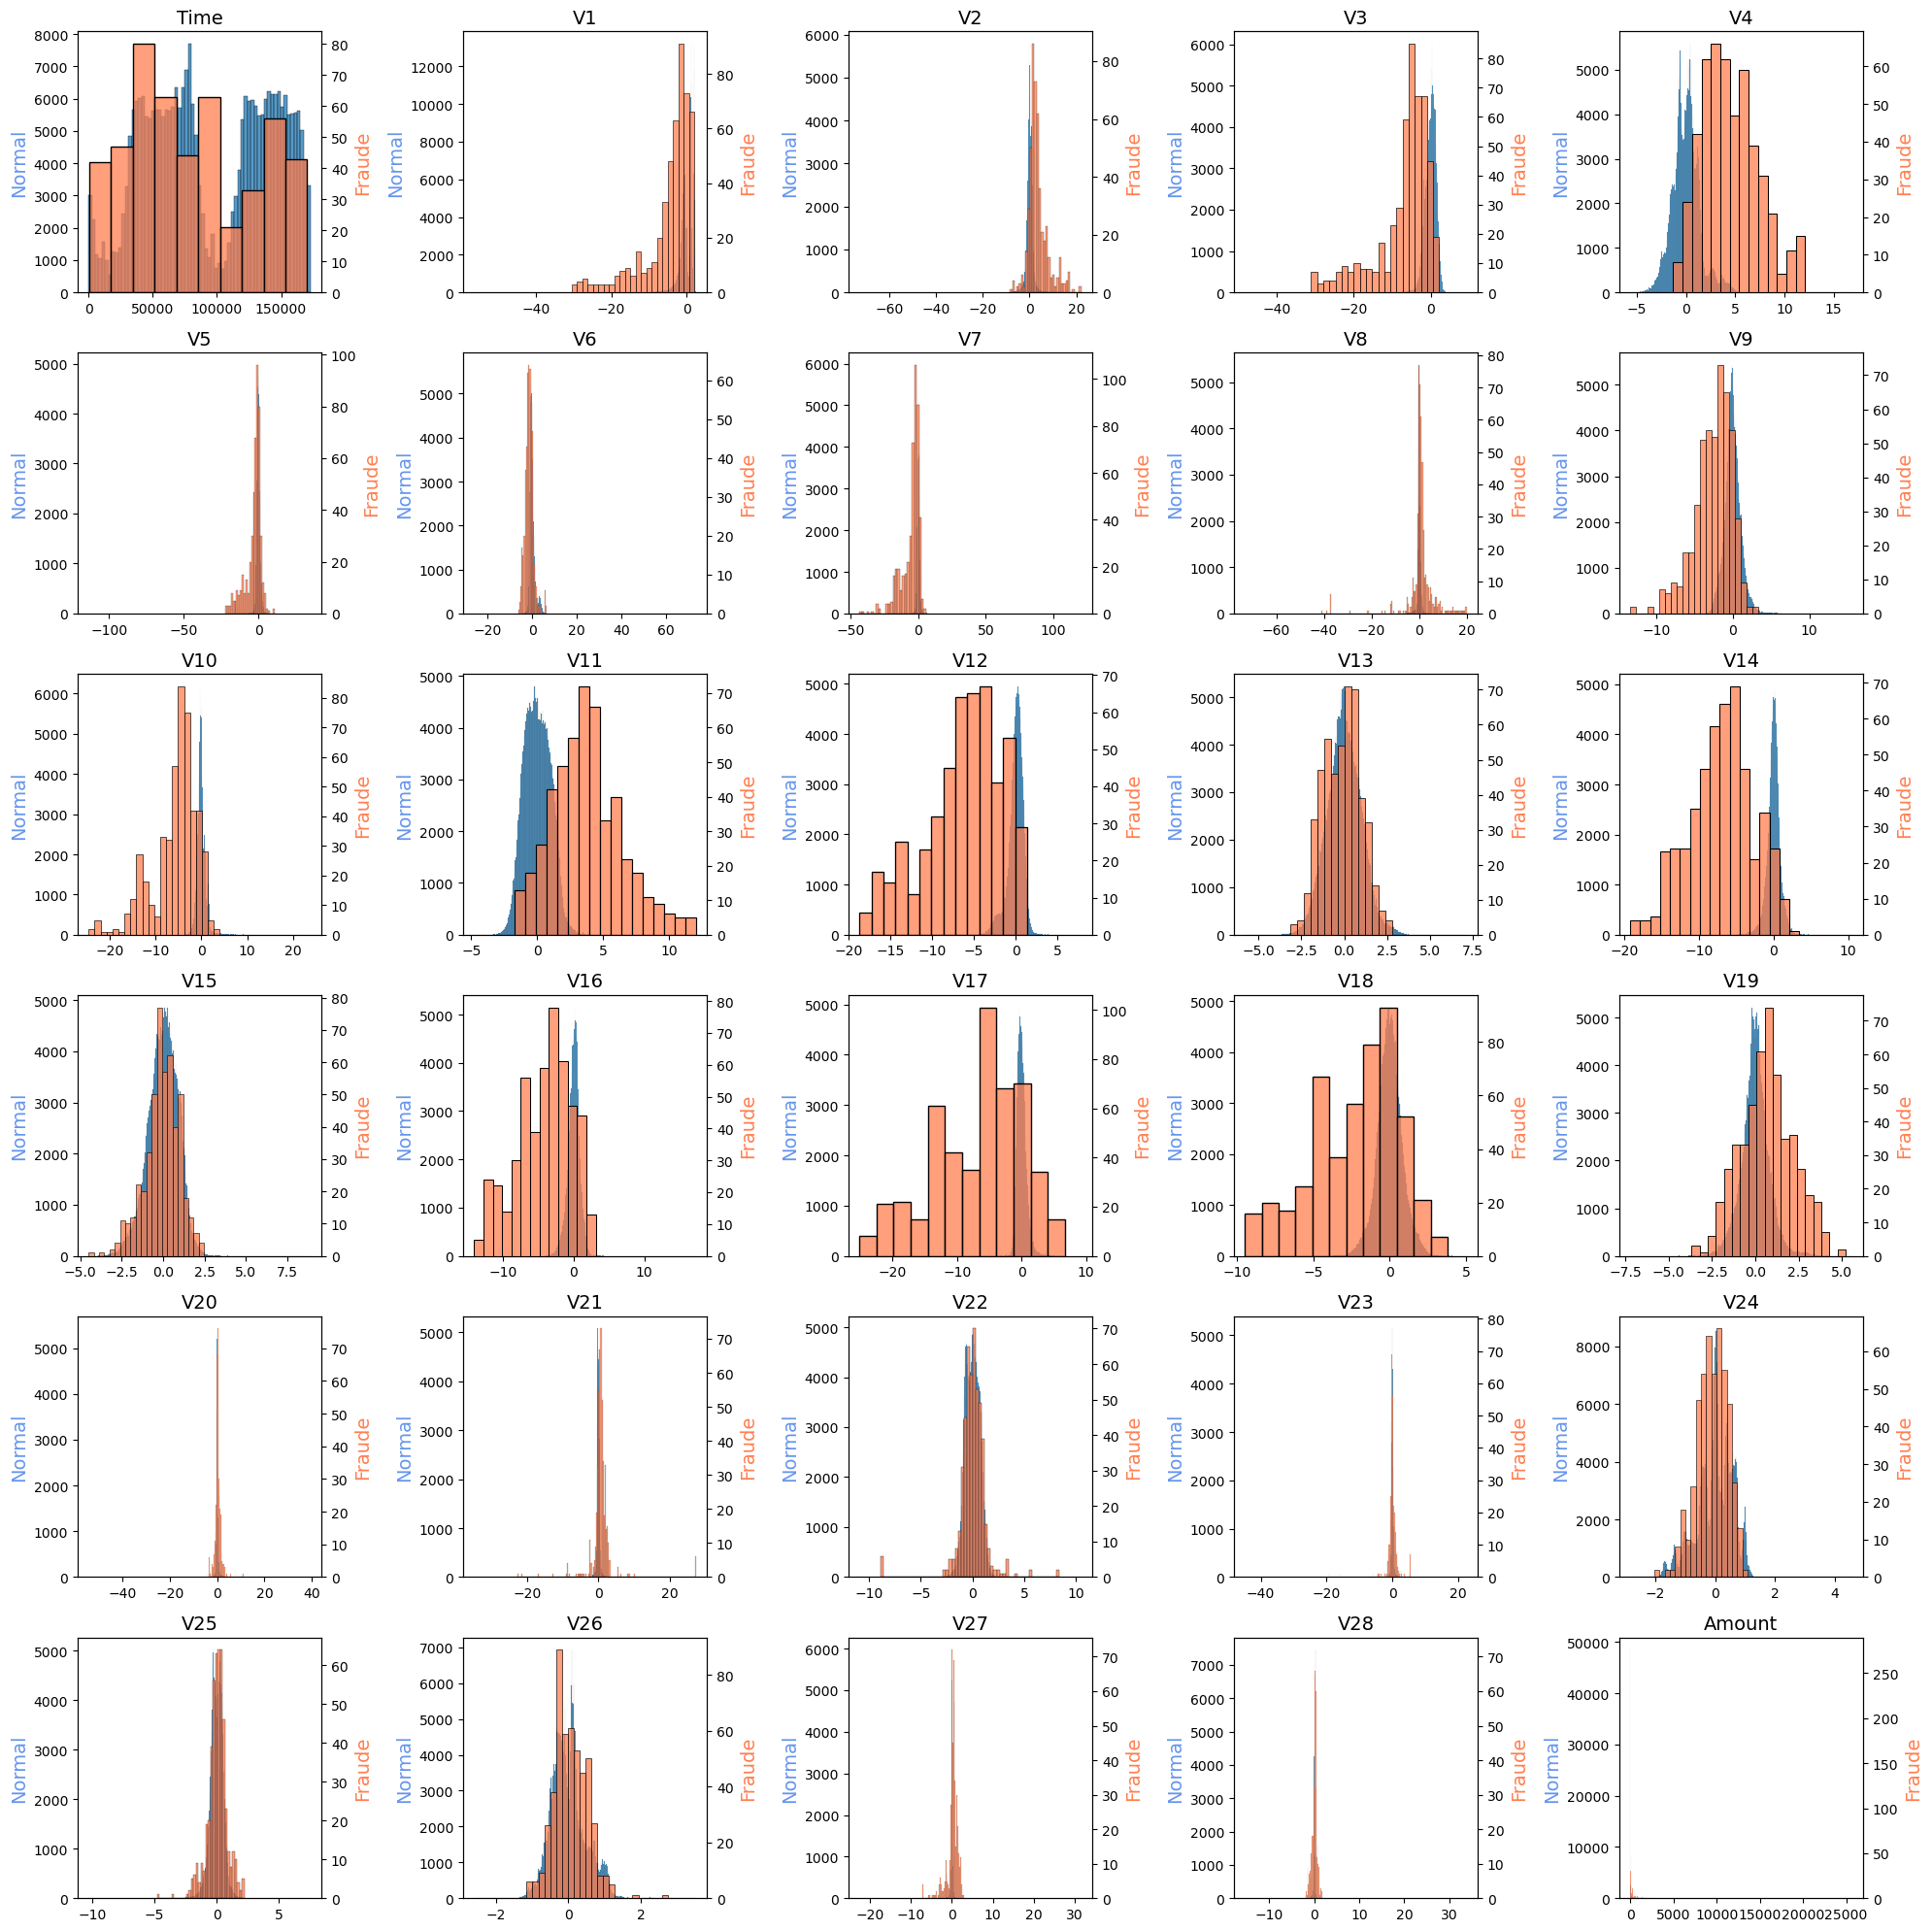

In [6]:
fig, ax1 = plt.subplots(figsize=(20,20))

for i,var in enumerate(df.columns[:-1]):
    plt.subplot(6,5,i+1)
    
    ax1 = sns.histplot(data=df[df["Class"]==0], x=var,label="Normal")
    ax1.set_ylabel("Normal",color="cornflowerblue", fontsize = 14)
    ax1.set_title(var,fontsize = 14)
    ax1.set_xlabel("")
    
    ax2 = ax1.twinx()
    sns.histplot(data=df[df["Class"]==1], x=var,color = 'coral',label="Fraude")
    ax2.set_ylabel("Fraude",color="coral", fontsize = 14)
    
fig.tight_layout()
plt.show()

realizando una inspección de la distribución de los datos por medio de histogramas, podemos ver que para ciertas variables la distribución de los registros con fraude es diferente de los que no (v11, v14, V12, v10, v4).

### **3) Dividir los datos en conjuntos de entrenamiento y de prueba**

In [7]:
# Definir X como las variables de  y Y
X = df.drop(['Class'],axis=1)
y = df['Class']

# Realizamos Split de test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

### **4) Implementar técnicas de sobremuestreo y submuestreo para equilibrar los datos.**

In [8]:
# Antes de realizar el over y under samplig procederemos a estandarizar los datos de las variables Time y Amount
selected = ['Amount','Time']
num_pipe = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor =  ColumnTransformer(transformers=[('numeric', num_pipe, selected)],remainder='passthrough')

# creamos el pipeline con el modelo
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [9]:
# Definimos los modelos para realizar el under y over sampling

# Under sampling
RUS         = RandomUnderSampler(random_state=0)
Near_Miss   = NearMiss(n_neighbors=3, version=2)
Tomek_Links = TomekLinks(sampling_strategy='majority')

# Over Sampling
ROS         = RandomOverSampler(random_state=0)
SMOTE       = SMOTE(random_state=0)
ADASYN      = ADASYN(random_state=0)

# Under y Over sampling
Smote_Tomek = SMOTETomek(random_state=0)

# Ajustamos X_train y y_train 
X_train_rus, y_train_rus = RUS.fit_resample(X_train_prep, y_train)
X_train_nm, y_train_nm   = Near_Miss.fit_resample(X_train_prep, y_train)
X_train_tl, y_train_tl   = Tomek_Links.fit_resample(X_train_prep, y_train)
X_train_ros, y_train_ros = ROS.fit_resample(X_train_prep, y_train)
X_train_sm, y_train_sm   = SMOTE.fit_resample(X_train_prep, y_train)
X_train_ada, y_train_ada = ADASYN.fit_resample(X_train_prep, y_train)
X_train_st, y_train_st   = Smote_Tomek.fit_resample(X_train_prep, y_train)

In [14]:
# Evaluamos que se haya realizado correctamente el under y el oversampling de los datos 
print('Datos Iniciales:')
print('Registros Original y_train: Normales: {0}, Fraude: {1}'.format(Counter(y_train)[0],Counter(y_train)[1]))
print('\nRandom Under Sampling:')
print('Registros RUS y_train: Normales: {0}, Fraude: {1}'.format(Counter(y_train_rus)[0],Counter(y_train_rus)[1]))
print('Registros Near_Miss y_train: Normales: {0}, Fraude: {1}'.format(Counter(y_train_nm)[0],Counter(y_train_nm)[1]))
print('Registros Tomek_Links y_train: Normales: {0}, Fraude: {1}'.format(Counter(y_train_tl)[0],Counter(y_train_tl)[1]))
print('\nRandom Over Sampling:')
print('Registros ROS y_train: Normales: {0}, Fraude: {1}'.format(Counter(y_train_ros)[0],Counter(y_train_ros)[1]))
print('Registros SMOTE y_train: Normales: {0}, Fraude: {1}'.format(Counter(y_train_sm)[0],Counter(y_train_sm)[1]))
print('Registros ADASYN y_train: Normales: {0}, Fraude: {1}'.format(Counter(y_train_ada)[0],Counter(y_train_ada)[1]))
print('\nCombinación:')
print('Registros SMOTE_TOMEK y_train: Normales: {0}, Fraude: {1}'.format(Counter(y_train_st)[0],Counter(y_train_st)[1]))

Datos Iniciales:
Registros Original y_train: Normales: 199019, Fraude: 345

Random Under Sampling:
Registros RUS y_train: Normales: 345, Fraude: 345
Registros Near_Miss y_train: Normales: 345, Fraude: 345
Registros Tomek_Links y_train: Normales: 199004, Fraude: 345

Random Over Sampling:
Registros ROS y_train: Normales: 199019, Fraude: 199019
Registros SMOTE y_train: Normales: 199019, Fraude: 199019
Registros ADASYN y_train: Normales: 199019, Fraude: 199032

Combinación:
Registros SMOTE_TOMEK y_train: Normales: 199019, Fraude: 199019


### **5) Entrene un modelo de aprendizaje automático con los datos equilibrados y evalúe su rendimiento.**

In [11]:
# definimos los modelos de Under y Over sampling a realizar sobre un modelo de regresión logística
modelos = [(X_train_rus, y_train_rus),
           (X_train_nm, y_train_nm),
           (X_train_tl, y_train_tl),
           (X_train_ros, y_train_ros),
           (X_train_sm, y_train_sm),
           (X_train_ada, y_train_ada),
           (X_train_st, y_train_st)]

nombres = ['U_RUS','U_Near-Miss','U_Tomek-Links','O_ROS','O_SMOTE','O_ADASYN','Smote-Tomek']

# Corremos un ciclo para evaluar lo modelos
resultado_modelos = []
for modelo, nombre in zip(modelos, nombres):
    X_train_C, y_train_C = modelo
    logi = LogisticRegression(max_iter=1000)
    logi.fit(X_train_C, y_train_C)
    prediction = logi.predict(X_test_prep)
    resultado_modelos.append((nombre, accuracy_score(y_test, prediction),precision_score(y_test, prediction),
                              recall_score(y_test, prediction),f1_score(y_test, prediction)))

# Creamos Dataframe con los resultados ordenados por F1
scores_df = pd.DataFrame(resultado_modelos, columns=['Modelo', 'Accuracy','Precision','Recall','F1'])
scores_df.sort_values(by=['F1'], ascending=False, inplace=True)
scores_df

,Modelo,Accuracy,Precision,Recall,F1
2,U_Tomek-Links,0.999204,0.883495,0.619048,0.728000
3,O_ROS,0.977342,0.065566,0.918367,0.122393
4,O_SMOTE,0.975352,0.060565,0.918367,0.113636
6,Smote-Tomek,0.975352,0.060565,0.918367,0.113636
0,U_RUS,0.962396,0.041293,0.938776,0.079106
5,O_ADASYN,0.916108,0.019044,0.945578,0.037335
1,U_Near-Miss,0.295776,0.002322,0.952381,0.004632


### **6) Comparar el rendimiento del modelo entrenado en los datos equilibrados con el rendimiento del modelo entrenado en los datos originales desequilibrados.**

In [12]:
# definimos el modelo base y lo corremos con los datos desbalanceados
logi = LogisticRegression(max_iter=1000)
logi.fit(X_train_prep, y_train)
prediction = logi.predict(X_test_prep)

resultado_modelos.append(('Logi', accuracy_score(y_test, prediction),precision_score(y_test, prediction),
                              recall_score(y_test, prediction),f1_score(y_test, prediction)))

# Creamos Dataframe con todos los resultados ordenados por F1
scores_df = pd.DataFrame(resultado_modelos, columns=['Modelo', 'Accuracy','Precision','Recall','F1'])
scores_df.sort_values(by=['F1'], ascending=False, inplace=True)
scores_df

,Modelo,Accuracy,Precision,Recall,F1
2,U_Tomek-Links,0.999204,0.883495,0.619048,0.728000
7,Logi,0.999204,0.883495,0.619048,0.728000
3,O_ROS,0.977342,0.065566,0.918367,0.122393
4,O_SMOTE,0.975352,0.060565,0.918367,0.113636
6,Smote-Tomek,0.975352,0.060565,0.918367,0.113636
0,U_RUS,0.962396,0.041293,0.938776,0.079106
5,O_ADASYN,0.916108,0.019044,0.945578,0.037335
1,U_Near-Miss,0.295776,0.002322,0.952381,0.004632


### **7) Comparar el rendimiento de los modelos entrenados con el rendimiento de un modelo que balancee desde los parámetros del modelo.**

In [13]:
# definimos el modelo base y lo corremos con los datos desbalanceados
logi = LogisticRegression(max_iter=1000,class_weight='balanced')
logi.fit(X_train_prep, y_train)
prediction = logi.predict(X_test_prep)

resultado_modelos.append(('Logi_balanced', accuracy_score(y_test, prediction),precision_score(y_test, prediction),
                              recall_score(y_test, prediction),f1_score(y_test, prediction)))

# Creamos Dataframe con todos los resultados ordenados por Recall
scores_df = pd.DataFrame(resultado_modelos, columns=['Modelo', 'Accuracy','Precision','Recall','F1'])
scores_df.sort_values(by=['Recall'], ascending=False, inplace=True)
scores_df

,Modelo,Accuracy,Precision,Recall,F1
1,U_Near-Miss,0.295776,0.002322,0.952381,0.004632
5,O_ADASYN,0.916108,0.019044,0.945578,0.037335
0,U_RUS,0.962396,0.041293,0.938776,0.079106
3,O_ROS,0.977342,0.065566,0.918367,0.122393
4,O_SMOTE,0.975352,0.060565,0.918367,0.113636
6,Smote-Tomek,0.975352,0.060565,0.918367,0.113636
8,Logi_balanced,0.977470,0.065918,0.918367,0.123007
2,U_Tomek-Links,0.999204,0.883495,0.619048,0.728000
7,Logi,0.999204,0.883495,0.619048,0.728000
